In [23]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import timeit
import scipy.fftpack
import scipy.io as sio
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal
from scipy import interpolate
from PIL import Image

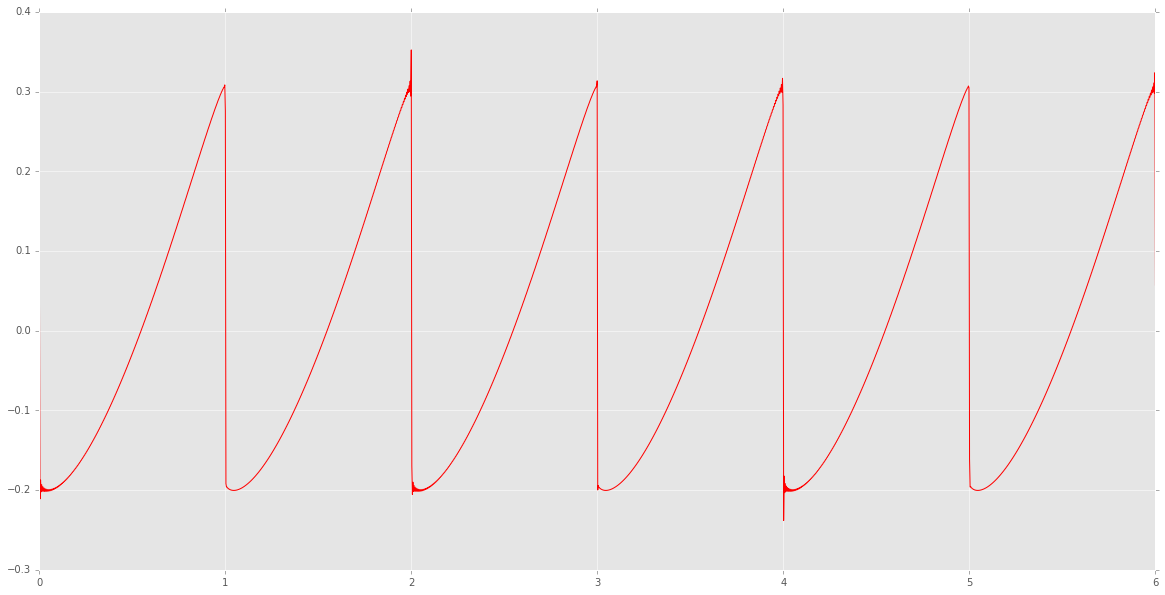

In [28]:


plt.style.use("ggplot")
q=2
p=2
srate=2000

# Setup
x_ = np.linspace(0,6,srate)

T = math.log(q,math.e)/math.log(p,math.e)
armonics = 1000

def squareWave(x):
    global T
    lowerBoundLeft = (-T)
    lowerBoundRight = 0
    upperBoundLeft = 0
    upperBoundRight = (T)
    one = 1
    negativeOne = -1

    while True:
        if (x >= lowerBoundLeft) and (x <= lowerBoundRight):
            return negativeOne
        elif (x >= upperBoundLeft) and (x <= upperBoundRight):
            return one
        else:
            lowerBoundLeft -= T
            lowerBoundRight -= T
            upperBoundLeft += T
            upperBoundRight += T
            if one == 1:
                one = -1
                negativeOne = 1
            else:
                one = 1
                negativeOne = -1
                
#an
def an(n):
    n = int(n)
    if (n%2 == 0):
        return ((q-1)*(np.cos(n*math.pi)+1)*math.log(q,math.e))/(math.pi**2*n**2+math.log(q,math.e)**2)
    else:
        return 0


# Bn coefficients
def bn(n):
    n = int(n)
    if (n%2 == 0):
        return -(math.pi*n*(q-1)*math.cos(math.pi*n)+1)/(math.pi**2*n**2+math.log(q,math.e)**2)
    else:
        return 0


# Wn
def wn(n):
    global T
    wn = (np.pi*n)/T
    return wn

# Fourier Series function
def fourierSeries(n_max,x):
    #a0 = (q-1)/math.log(q,math.e)
    a0 = 0
    partialSums = a0
    for n in range(1,n_max):
        try:
            partialSums = partialSums +an(n)*np.cos(wn(n)*x) +bn(n)*np.sin(wn(n)*x)
        except:
            print("pass")
            pass
    return partialSums


y = []
f = []
for i in x_:
    y.append(squareWave(i))
    f.append(fourierSeries(armonics,i))


#plt.plot(x_,y,color="blue",label="Signal")
plt.figure(figsize=(20,10))
plt.plot(x_,f,color="red")
#plt.title("Fourier Series approximation number of armonics: "+str(armonics))
#plt.legend()
plt.show()


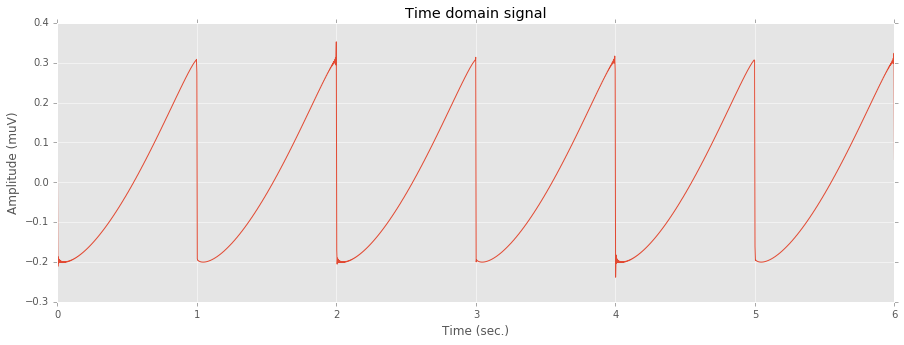

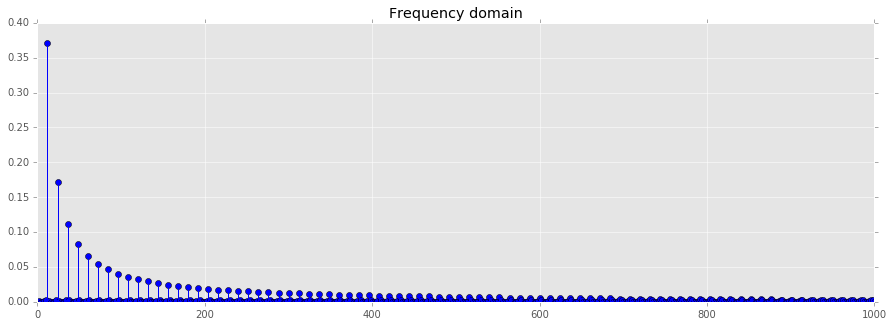

In [37]:


# extract data from mat file
eegdata = f



n = armonics
timevec = np.arange(n)/srate

# compute amplitude spectrum
dataX    = scipy.fftpack.fft(eegdata)/n
ampspect = 2*abs(dataX)
hz       = np.linspace(0,srate/2,int(np.floor(n/2)+1))

#freq spectum
plt.figure(figsize=(15,5))
plt.plot(x_,eegdata)
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude (muV)')
plt.title('Time domain signal')
plt.show()

# show amplitude spectrum
plt.figure(figsize=(15,5))
plt.stem(hz,ampspect[0:int(np.floor(n/2)+1)],color='blue')
plt.xlim([0,srate/2])
plt.ylim([0,.4])
plt.title('Frequency domain')
plt.show()


/home/robert/.local/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


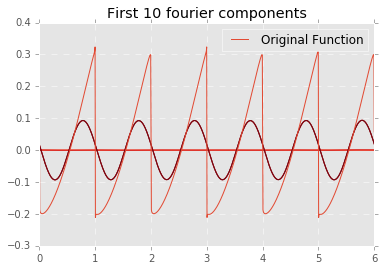

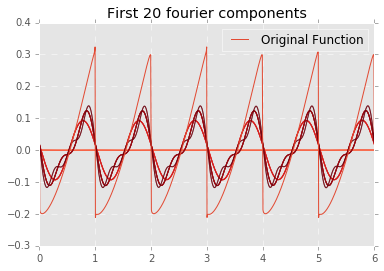

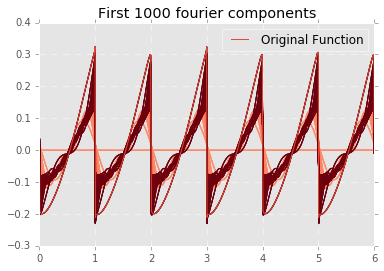

In [27]:
import numpy
from matplotlib import pyplot as plt

n = len(f)
COMPONENTS = [10, 20, n]

for c in COMPONENTS:
    colors = numpy.linspace(start=100, stop=255, num=c)
    for i in range(c):
        Y = numpy.fft.fft(f)
        numpy.put(Y, range(i+1, n), 0.0)
        ifft = numpy.fft.ifft(Y)
        plt.plot(x_, ifft, color=plt.cm.Reds(int(colors[i])), alpha=.70)

    plt.title("First {c} fourier components".format(c=c))
    plt.plot(x_,f, label="Original Function")
    plt.grid(linestyle='dashed')
    plt.legend()
    plt.show()

In [35]:
o=0
corr = []
freqlist =[]
amplist =[]
for i in hz:
    freqlist.append((i*(srate/len(ampspect[0:int(np.floor(n/2)+1)]))))
for i in ampspect[0:int(np.floor(n/2)+1)]:
    amplist.append(i)
for j in range(len(hz)):
    if math.ceil(freqlist[j]/8)%6 == 0:
        print(math.ceil(freqlist[j]/8)%6,amplist[j])
        corr.append(amplist[j])

0 0.000114469316684
0 0.37123392728
0 0.172219923695
0 0.111839415753
0 0.082757006917
0 0.0656556085803
0 0.0543963593688
0 0.0464213376227
0 0.0404753907315
0 0.0358705689276
0 0.0321982956418
0 0.0292006399516
0 0.0267067530204
0 0.0245989812473
0 0.0227936595726
0 0.0212296655151
0 0.0198613065102
0 0.0186537402901
0 0.0175799348762
0 0.0166185963843
0 0.0157527233036
0 0.0149685768935
0 0.0142549343661
0 0.0136025382111
0 0.0130036840845
0 0.0124519082217
0 0.0119417474212
0 0.0114685526734
0 0.011028342951
0 0.0106176894125
0 0.0102336228865
0 0.00987355935342
0 0.00953523946777
0 0.00921667912881
0 0.00891612881464
0 0.00863203991894
0 0.00836303672278
0 0.00810789293097
0 0.0078655119286
0 0.00763491008728
0 0.00741520258545
0 0.00720559131159
0 0.00700535450224
0 0.00681383783102
0 0.00663044671727
0 0.00645463966374
0 0.00628592246629
0 0.00612384316525
0 0.00596798762992
0 0.0058179756855
0 0.00567345770627
0 0.00553411161076
0 0.0053996402047
0 0.00526976882571
0 0.00514424

In [36]:
corr

[0.00011446931668411409,
 0.37123392728047372,
 0.17221992369549424,
 0.11183941575342983,
 0.082757006917018081,
 0.065655608580305655,
 0.054396359368813152,
 0.046421337622745668,
 0.040475390731547732,
 0.035870568927565114,
 0.032198295641798803,
 0.029200639951599699,
 0.026706753020436749,
 0.024598981247268573,
 0.022793659572635457,
 0.021229665515135776,
 0.019861306510238923,
 0.018653740290098419,
 0.017579934876219262,
 0.016618596384307082,
 0.015752723303633514,
 0.014968576893487876,
 0.014254934366074177,
 0.013602538211118181,
 0.013003684084480429,
 0.012451908221738247,
 0.011941747421193112,
 0.011468552673425456,
 0.011028342951028794,
 0.010617689412472637,
 0.010233622886471297,
 0.0098735593534200021,
 0.0095352394677700163,
 0.0092166791288050207,
 0.0089161288146388223,
 0.0086320399189412592,
 0.008363036722780182,
 0.0081078929309714425,
 0.0078655119285956938,
 0.0076349100872845337,
 0.0074152025854478916,
 0.0072055913115928625,
 0.0070053545022378321,
 